# Tarea Número 4

## Pregunta 1

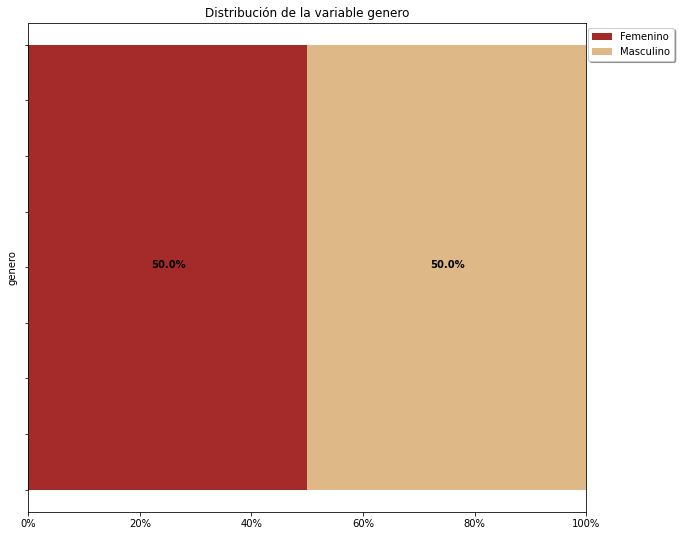

In [1]:
from utils.DataFrameUtils import DataFrameUtils
from utils.QualityModel import QualityModel
from method.KNeighborsModel import KNeighborsModel
from method.RandomForestModel import RandomForestModel
from method.ADABoostingModel import ADABoostingModel
from method.XGBoostingModel import XGBoostingModel
from method.SVMModel import SVMModel

# 1. Carga de datos
data_voces = DataFrameUtils.read_cvs("/mnt/c/Users/rtsz/Learning/promidat_ml/module_3/week_4/homework/src/data/voces.csv", delimiter = ",", decimal = ".", index_col = None)
qualityModel = QualityModel(data_voces)
qualityModel.distribution_predict_variable("genero")

In [2]:
# 2. Calculando predicciones con SVM
svmModel = SVMModel(data_voces)
svmModel.build_model(variable_predict = "genero", train_size = 0.8)
svmModel.train_model(metadata = {})

# 2. Mostrando los datos de la predicción e índices
svmModel.print_testing_info()
svmModel.print_indexes_info()


Variables Predictoras:

   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  0.000000  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  0.000000  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  0.000000  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  0.083878  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  0.104261  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfran

> Al parecer los resultados de esta ejecución de SVM no son óptimos, los valores de la precisión global y por categoría son bastante bajos en comparaciónd de los ejercicios anteriores con otros modelos de predicción

In [3]:
# 3. Generación de los modelos anteriores

# K-Neighbors
kNeighborsModel = KNeighborsModel(data_voces)
kNeighborsModel.build_model(variable_predict = "genero", train_size = 0.8)
kNeighborsModel.train_model(metadata = {})
kNeighborsModel.calculate_indexes()

# Random Forest
randomForestModel = RandomForestModel(data_voces)
randomForestModel.build_model(variable_predict = "genero", train_size = 0.8)
randomForestModel.train_model(metadata = {})
randomForestModel.calculate_indexes()

# ADA Boosting
adaBoostingModel = ADABoostingModel(data_voces)
adaBoostingModel.build_model(variable_predict = "genero", train_size = 0.8)
adaBoostingModel.train_model(metadata = {})
adaBoostingModel.calculate_indexes()

# ADA Boosting
xgBoostingModel = XGBoostingModel(data_voces)
xgBoostingModel.build_model(variable_predict = "genero", train_size = 0.8)
xgBoostingModel.train_model(metadata = {})
xgBoostingModel.calculate_indexes()


# 3. Matriz de Comparación
print("Matriz de Comparación")
indexes = DataFrameUtils.create_dataframe_from_dict(
    [
        kNeighborsModel.indexes.get_indexes_dictionary(),
        randomForestModel.indexes.get_indexes_dictionary(),
        adaBoostingModel.indexes.get_indexes_dictionary(),
        xgBoostingModel.indexes.get_indexes_dictionary(),
        svmModel.indexes.get_indexes_dictionary()
    ], columns = ["K-Neighbors","Random Forest", "ADA Boosting", "XG Boosting","SVM Model"])
print(indexes)

Matriz de Comparación
                          K-Neighbors  Random Forest  ADA Boosting  \
Precisión Global             0.712934       0.982650      0.971609   
Error Global                 0.287066       0.017350      0.028391   
Precisión Femenino           0.664452       0.980066      0.953488   
Precisión Masculino          0.756757       0.984985      0.987988   
Falso Positivo Femenino      0.335548       0.019934      0.046512   
Falso Positivo Masculino     0.243243       0.015015      0.012012   
Asertividad Femenino         0.335548       0.019934      0.046512   
Asertividad Masculino        0.243243       0.015015      0.012012   

                          XG Boosting  SVM Model  
Precisión Global             0.973186   0.679811  
Error Global                 0.026814   0.320189  
Precisión Femenino           0.963455   0.568106  
Precisión Masculino          0.981982   0.780781  
Falso Positivo Femenino      0.036545   0.431894  
Falso Positivo Masculino     0.018018   0

> Utilizando los parámetros por defecto de el modelo SVN nos damos cuenta que está muy por debajo de los modelos programados en las tareasa anteriores, al parecer si tomamos en cuenta la precisión global y por categoría, para este caso sería Random Forest la mejor opción

In [17]:
# 4. Utiliando diferentes parámetros de cada modelo
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
index_kernels = []

for kernel in kernels:
    model = SVMModel(data_voces)
    model.build_model(variable_predict = "genero", train_size = 0.8)
    model.train_model(metadata = {"kernel" : kernel})
    model.calculate_indexes()
    index_kernels.append(model.indexes.get_indexes_dictionary())
    
indexes = DataFrameUtils.create_dataframe_from_dict(index_kernels, columns = kernels)
print(indexes)   

                            linear      poly       rbf   sigmoid
Precisión Global          0.924290  0.490536  0.679811  0.643533
Error Global              0.075710  0.509464  0.320189  0.356467
Precisión Femenino        0.857143  0.980066  0.568106  0.657807
Precisión Masculino       0.984985  0.048048  0.780781  0.630631
Falso Positivo Femenino   0.142857  0.019934  0.431894  0.342193
Falso Positivo Masculino  0.015015  0.951952  0.219219  0.369369
Asertividad Femenino      0.142857  0.019934  0.431894  0.342193
Asertividad Masculino     0.015015  0.951952  0.219219  0.369369


> Utilizando los diferentes kernel provistos por python encontramos que la mejor precisión es obtenida con el kernel **linear** de igual forma con ese kernel se tienen mejores precisiones tanto para masculino como para femenino, las otras opciones tienen precisiones muy bajas como para ser utilizadas

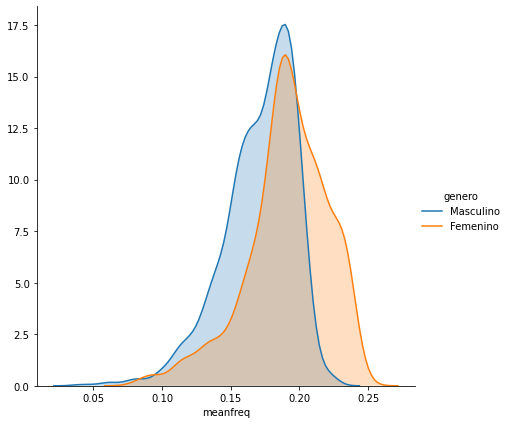

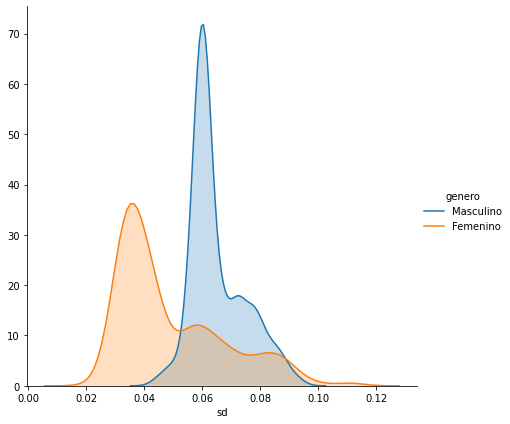

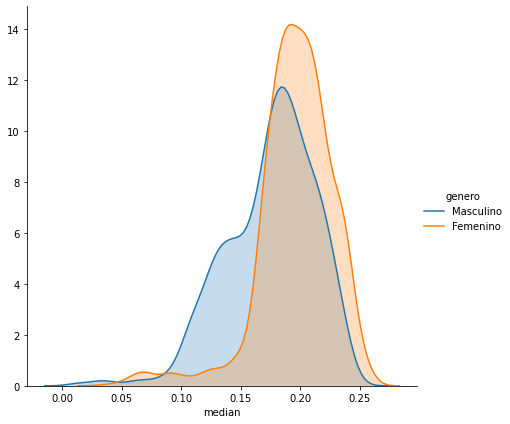

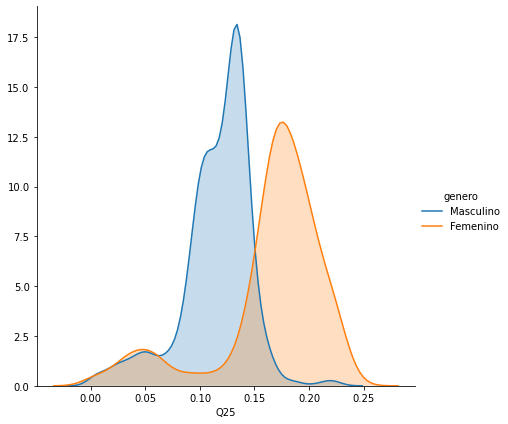

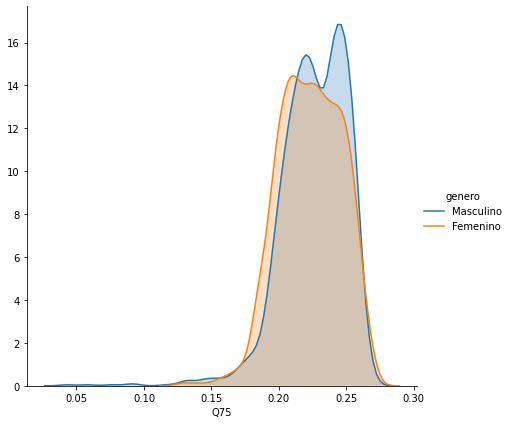

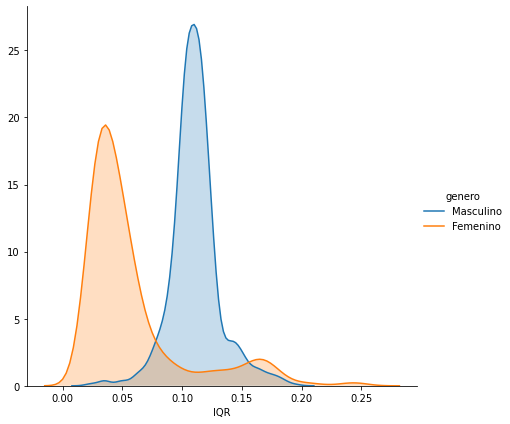

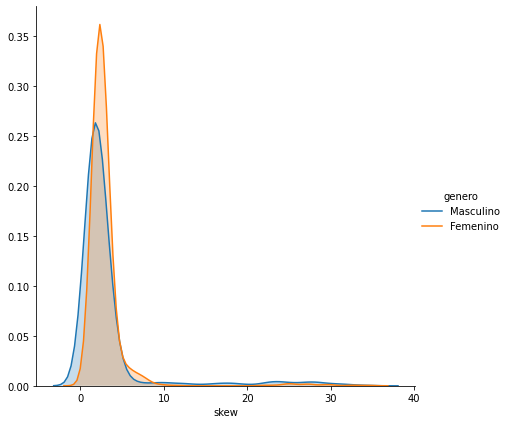

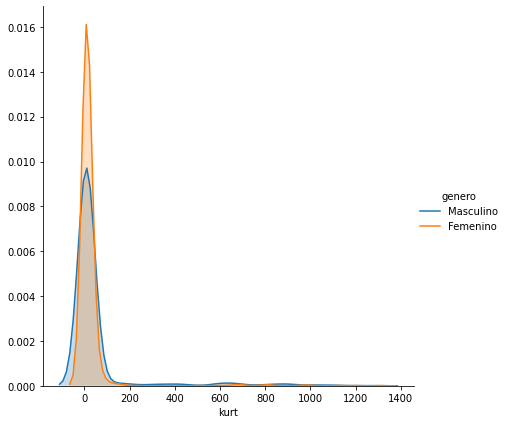

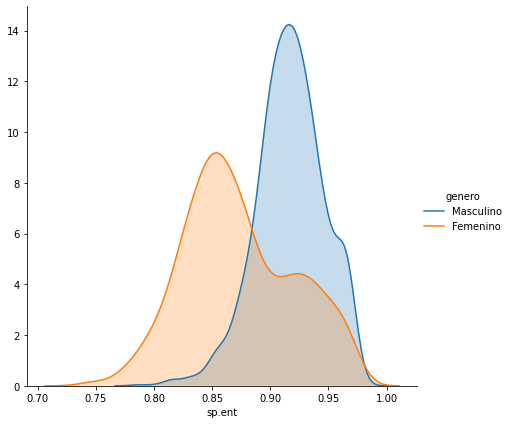

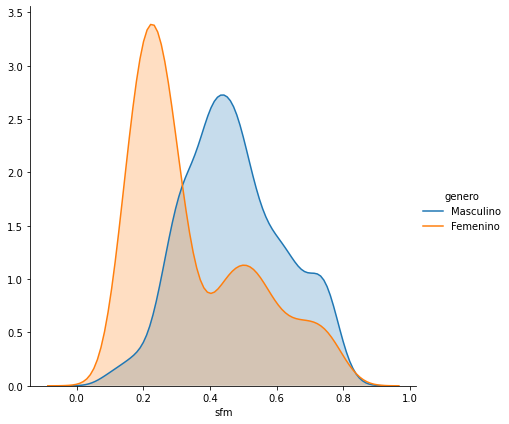

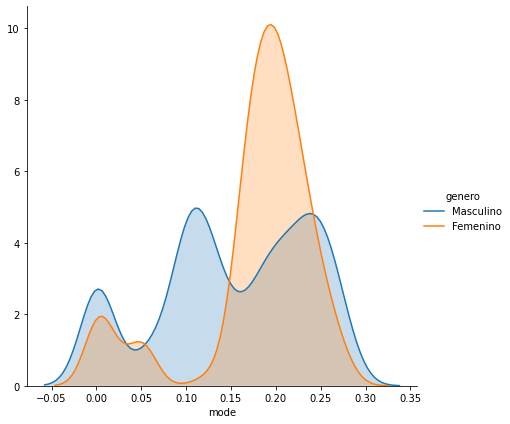

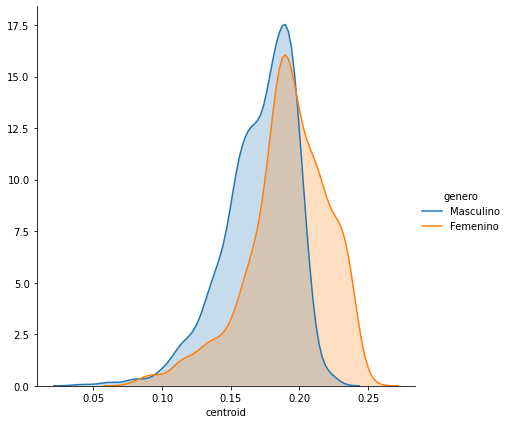

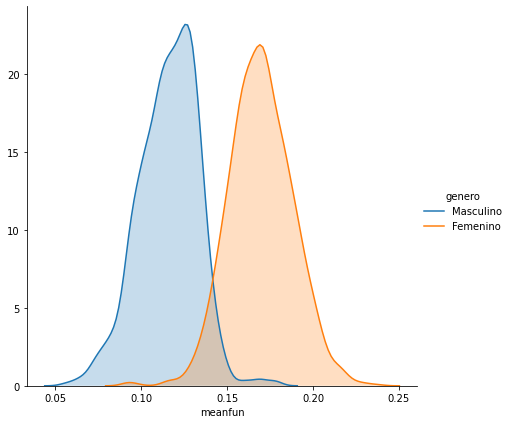

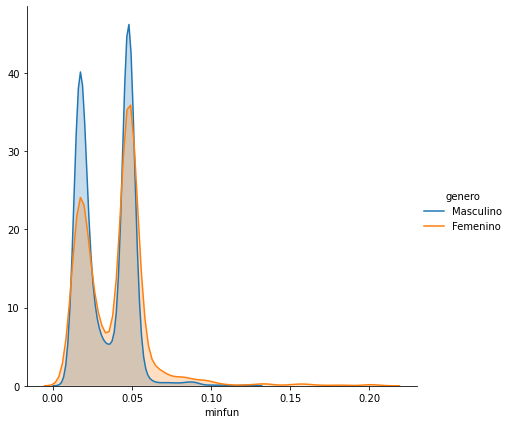

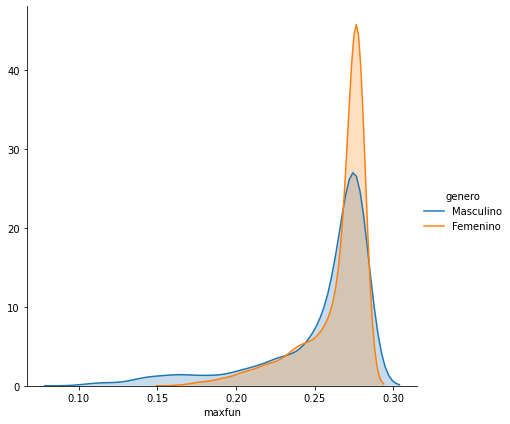

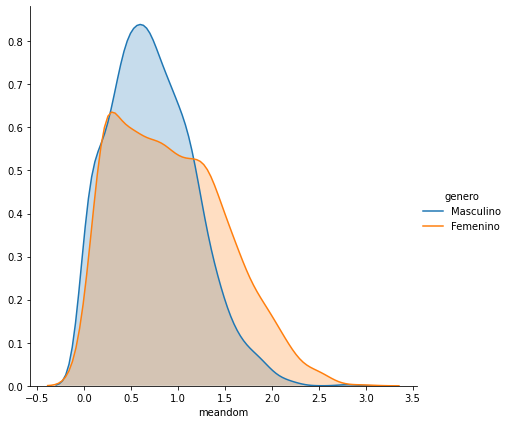

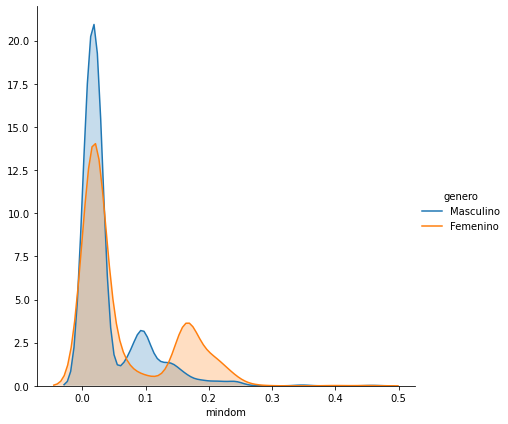

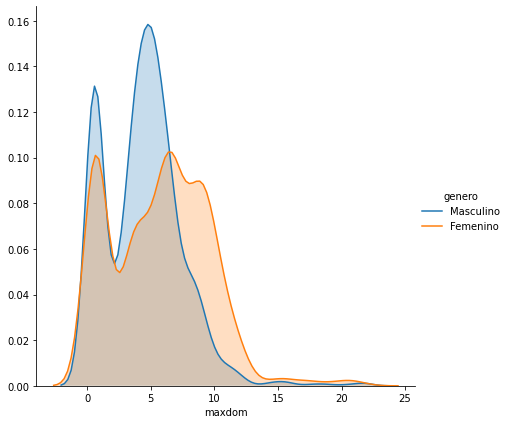

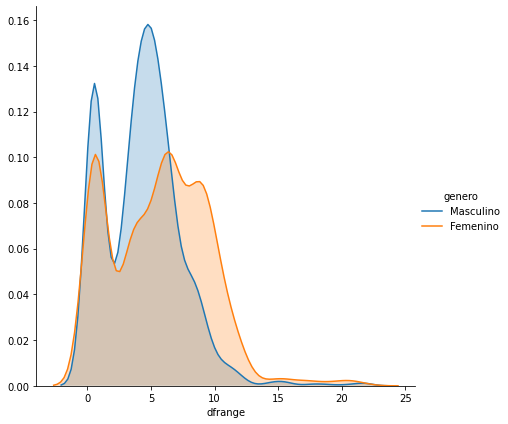

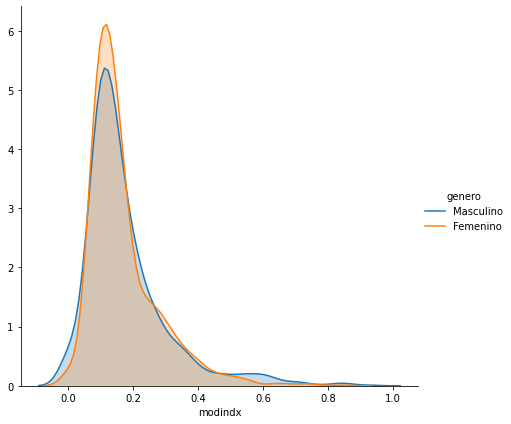

In [5]:
# 5. Mostramos el poder predictivo de las variables
qualityModel.predictive_power_by_variable()

In [18]:
# 5. Seleccionamos las variables con mayor poder predictivo
data_selected_1 = DataFrameUtils.filter_columns(data_voces, ["sd", "Q25", "IQR", "sfm", "sp.ent", "meanfun", "genero"])
svmModel_1 = RandomForestModel(data_selected_1)
svmModel_1.build_model(variable_predict = "genero", train_size = 0.8)
svmModel_1.train_model(metadata = {"kernel" : "linear"})
svmModel_1.calculate_indexes()

# 5. Seleccionamos las variables con menor poder predictivo
data_selected_2 = DataFrameUtils.filter_columns(data_voces, ["modindx", "mindom", "minfun", "mode", "kurt", "meanfreq", "genero"])
svmModel_2 = RandomForestModel(data_selected_2)
svmModel_2.build_model(variable_predict = "genero", train_size = 0.8)
svmModel_2.train_model(metadata = {"kernel" : "linear"})
svmModel_2.calculate_indexes()

# 5. Matriz de Comparación
print("Matriz de Comparación")
indexes = DataFrameUtils.create_dataframe_from_dict(
    [
        svmModel_1.indexes.get_indexes_dictionary(),
        svmModel_2.indexes.get_indexes_dictionary()
    ], columns = ["Mayor Poder Predictivo", "menor Poder Predictivo"])
print(indexes)

Matriz de Comparación
                          Mayor Poder Predictivo  menor Poder Predictivo
Precisión Global                        0.984227                0.883281
Error Global                            0.015773                0.116719
Precisión Femenino                      0.990033                0.890365
Precisión Masculino                     0.978979                0.876877
Falso Positivo Femenino                 0.009967                0.109635
Falso Positivo Masculino                0.021021                0.123123
Asertividad Femenino                    0.009967                0.109635
Asertividad Masculino                   0.021021                0.123123


> Definitivamente al usar variables con mejor poder predictivo los indices mejoran tanto para global como por categoría, se utilizó el kernel **linear** para estos modelos y se nota claramente que los valores de falsos positivos son bajísimos haciendo una poderosa combinación la seleccion de variables y el kernel adecuado

## Pregunta 2

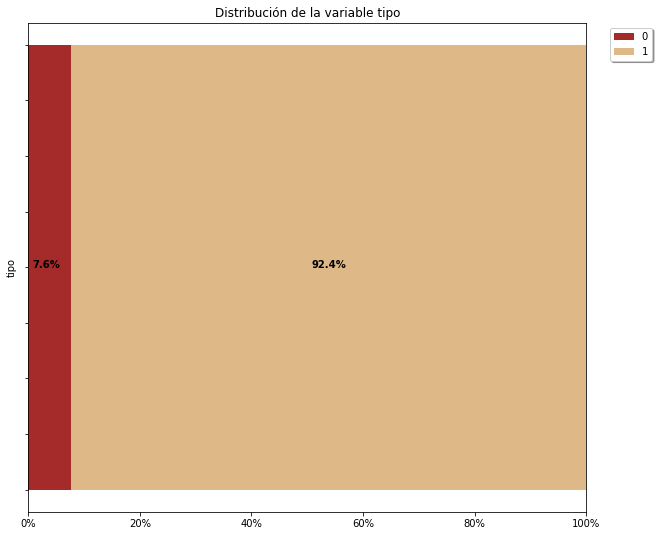

In [8]:
data_tumores = DataFrameUtils.read_cvs("/mnt/c/Users/rtsz/Learning/promidat_ml/module_3/week_3/homework/src/data/tumores.csv", delimiter = ",", decimal = ".", index_col = 0)
qualityModel = QualityModel(data_tumores)
qualityModel.distribution_predict_variable("tipo")

In [20]:
# 1 Random Forest
svmModelo = RandomForestModel(data_tumores)
svmModelo.build_model(variable_predict = "tipo", train_size = 0.7)
svmModelo.train_model(metadata = {})

svmModelo.print_testing_info()
svmModelo.print_indexes_info()


Variables Predictoras:

            media     varianza  desviacion.estandar  entropia  asimetria  \
imagen                                                                     
Image1  23.448517  2538.985627            50.388348  0.651174   1.984202   
Image2   4.398331   834.853030            28.893823  0.953532   6.495203   
Image3   3.244263   642.059166            25.338886  0.966065   7.772860   
Image4   8.511353  1126.214187            33.559115  0.868765   3.763142   
Image5  21.000793  2235.316978            47.279139  0.684724   1.936029   

         kurtosis   contraste   energia       asm  homogeneidad  disiminitud  \
imagen                                                                         
Image1   5.421042  181.467713  0.781557  0.610831      0.847033     2.765411   
Image2  43.349355   76.745886  0.972770  0.946281      0.980762     0.548605   
Image3  61.756034   81.752406  0.980161  0.960715      0.985066     0.540411   
Image4  15.107579  362.291213  0.921786  0

In [22]:
# 2. Ejecutando los modelos anteriores
# K-Neighbors
kNeighborsModel = KNeighborsModel(data_tumores)
kNeighborsModel.build_model(variable_predict = "tipo", train_size = 0.7)
kNeighborsModel.train_model(metadata = {})
kNeighborsModel.calculate_indexes()

# Random Forest
randomForestModel = RandomForestModel(data_tumores)
randomForestModel.build_model(variable_predict = "tipo", train_size = 0.7)
randomForestModel.train_model(metadata = {})
randomForestModel.calculate_indexes()

# ADA Boosting
adaBoostingModel = ADABoostingModel(data_tumores)
adaBoostingModel.build_model(variable_predict = "tipo", train_size = 0.7)
adaBoostingModel.train_model(metadata = {})
adaBoostingModel.calculate_indexes()

# ADA Boosting
xgBoostingModel = XGBoostingModel(data_tumores)
xgBoostingModel.build_model(variable_predict = "tipo", train_size = 0.7)
xgBoostingModel.train_model(metadata = {})
xgBoostingModel.calculate_indexes()


# 3. Matriz de Comparación
print("Matriz de Comparación")
indexes = DataFrameUtils.create_dataframe_from_dict(
    [
        kNeighborsModel.indexes.get_indexes_dictionary(),
        randomForestModel.indexes.get_indexes_dictionary(),
        adaBoostingModel.indexes.get_indexes_dictionary(),
        xgBoostingModel.indexes.get_indexes_dictionary(),
        svmModelo.indexes.get_indexes_dictionary()
    ], columns = ["K-Neighbors","Random Forest", "ADA Boosting", "XG Boosting","SVM Model"])
print(indexes)

Matriz de Comparación
                  K-Neighbors  Random Forest  ADA Boosting  XG Boosting  \
Precisión Global     0.906005       0.992167      0.989556     0.986945   
Error Global         0.093995       0.007833      0.010444     0.013055   
Precisión 0          0.000000       1.000000      0.969697     0.939394   
Precisión 1          0.991429       0.991429      0.991429     0.991429   
Falso Positivo 0     1.000000       0.000000      0.030303     0.060606   
Falso Positivo 1     0.008571       0.008571      0.008571     0.008571   
Asertividad 0        1.000000       0.000000      0.030303     0.060606   
Asertividad 1        0.008571       0.008571      0.008571     0.008571   

                  SVM Model  
Precisión Global   0.992167  
Error Global       0.007833  
Precisión 0        1.000000  
Precisión 1        0.991429  
Falso Positivo 0   0.000000  
Falso Positivo 1   0.008571  
Asertividad 0      0.000000  
Asertividad 1      0.008571  


>Los índices de predicción global son muy buenos para cada modelo por lo que tenemos que utilizar la precisión por categoría para decidir cual es el mejor modelo, se nota que la precisión para Tipo = 1 es la misma para todos los modelos, sin embargo Random Forest y SVM tienen valores perfectos para Tipo = 0, de igual forma para los valores de falos positivos o asertividad, se puede utilizar cualquiera de los dos modelos para esta predicción

In [23]:
# 3. Utiliando diferentes parámetros de cada modelo
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
index_kernels = []

for kernel in kernels:
    model = SVMModel(data_tumores)
    model.build_model(variable_predict = "tipo", train_size = 0.7)
    model.train_model(metadata = {"kernel" : kernel})
    model.calculate_indexes()
    index_kernels.append(model.indexes.get_indexes_dictionary())
    
indexes = DataFrameUtils.create_dataframe_from_dict(index_kernels, columns = kernels)
print(indexes)  

                    linear      poly       rbf   sigmoid
Precisión Global  0.934726  0.913838  0.913838  0.911227
Error Global      0.065274  0.086162  0.086162  0.088773
Precisión 0       0.454545  0.000000  0.000000  0.000000
Precisión 1       0.980000  1.000000  1.000000  0.997143
Falso Positivo 0  0.545455  1.000000  1.000000  1.000000
Falso Positivo 1  0.020000  0.000000  0.000000  0.002857
Asertividad 0     0.545455  1.000000  1.000000  1.000000
Asertividad 1     0.020000  0.000000  0.000000  0.002857


/mnt/c/Users/rtsz/Learning/promidat_ml/module_3/week_4/homework/src/method/ModelIndexCalculator.py:47: RuntimeWarning: invalid value encountered in true_divide
  self.__assertiveness_by_category = pd.DataFrame(self.__matrix.diagonal() / np.sum(self.__matrix, axis = 0)).T
/mnt/c/Users/rtsz/Learning/promidat_ml/module_3/week_4/homework/src/method/ModelIndexCalculator.py:47: RuntimeWarning: invalid value encountered in true_divide
  self.__assertiveness_by_category = pd.DataFrame(self.__matrix.diagonal() / np.sum(self.__matrix, axis = 0)).T


>De igual forma que ne el ejercicio anteriore, los valores de los índices mejora para el kernel **linear**, si bien para todos los kernels la precisión global es muy buena, con la exception de **linear** todos los kernels tienen una precisión pésima para tipo=0, por lo que no se pueden utilizar para este caso 

## Pregunta 3